<a href="https://colab.research.google.com/github/Rino04/Moringa_week_9_IP/blob/main/Email_NaiveBayes_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

### a) Specifying the Question

> Predict the chance of an email being spam or a not-spam using Naive Bayes theorem


### b) Defining the Metric for Success

> The metric of success is if we can build a Naive Bayes theorem that can give a good accuracy in classifying if an email is a spam or not.

### c) Understanding the context 

### d) Recording the Experimental Design

The following steps will be followed in conducting this analysis:
1. Defining the Question
2. Reading the Data.
3. Data Exploration.
4. Data Cleaning
5. Data Analysis
6. Prediction Models
7. Evaluation of the solution
8. Challenging the solution
9. Conclusion

### e) Data Relevance

The data is relevant as it will help in prediction of whether a passenger survived or not. 

# Data Exploration

### Importing the libraries

In [1]:
#For data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder as Le


#for metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

#warnings
import warnings
warnings.filterwarnings('ignore') 

### Loading and prievew the datasets

In [27]:
# Loading the train dataset
# Define the column names
column = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
'char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','spam']

spam_df=pd.read_csv('/content/spambase.data', names=column)

In [28]:
#check the info 
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [29]:
#check the shape 
print('This Spam dataset has ' + str(spam_df.shape[0]) + ' rows, and ' + str(spam_df.shape[1]) + ' columns')

This Spam dataset has 4601 rows, and 58 columns


In [30]:
#Preview the head of train
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [31]:
# preview the tail
spam_df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


# Data Cleaning

### Uniformity

In [32]:
#We shall have the our column names written in pascal format
spam_df.columns=spam_df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
spam_df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [33]:
#Lets check for unique values for each column
for col in list(spam_df):
    print(col)
    print(spam_df[col].unique())
    print("******")

word_freq_make
[0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]
******
word_freq_address
[6.400e-01 2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01
 7.000e-02 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01
 1.920e+00 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01
 4.400e-01 9.400e-01 1.80

### Completeness

In [34]:
#check for null values
spam_df.isnull().sum()
#There are no null values in our dataset

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### Consistency 

In [35]:
#we will look for the number of rows with duplicate records
print('Number of rows with duplicated values',spam_df.duplicated().sum())

#we then drop the rows with duplicated records
spam_df.drop_duplicates(inplace=True)
print('After dropping there are',spam_df.duplicated().sum(), "Duplicated rows")

print('Shape of dataframe after dropping duplicated rows', spam_df.shape)

Number of rows with duplicated values 391
After dropping there are 0 Duplicated rows
Shape of dataframe after dropping duplicated rows (4210, 58)


# Exploratory Data Analysis

### Univarient Analysis

In [37]:
#Get the statistical summaries
spam_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ccd93c510>,
      dtype=object)

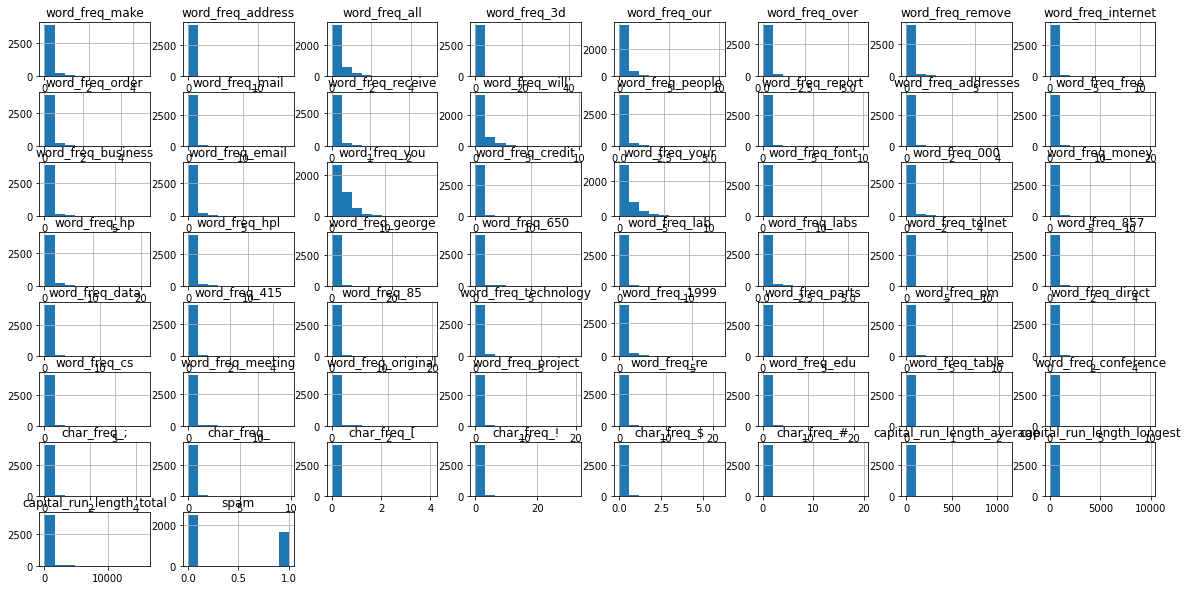

In [38]:
#visulize the distributions of the columns
spam_df.hist(figsize = (20,10))

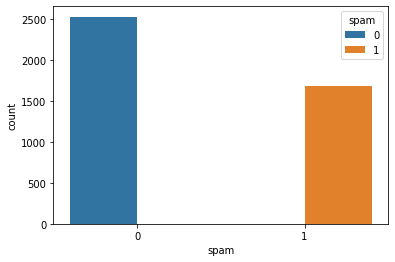

In [40]:
#Visulize the distribution of gender in the boat
sns.countplot(x='spam', data=spam_df, hue='spam')
#From the countplot we can seen that moszt of the emails are not spams

### Bivarient Analysis

In [45]:
#Visulize the heatmap
corr = spam_df.corr() 
corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0.089520,-0.050

# Modelling

## Gaussian Naive Bayes Classifier

In [52]:
#Define a function
from sklearn.naive_bayes import GaussianNB
def model(X,y, test_frac):

  #split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_frac, random_state = 0)

 
  #create and fit model
  clf = GaussianNB().fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  #evaluate model
  print('Training Accuracy:', accuracy_score(y_train, clf.predict(X_train)))
  print('Test Accuracy:', accuracy_score(y_test,y_pred))
  print("F1 score", f1_score(y_test,y_pred))
  print('*******')
  print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
  print('*******')
  print('Classification Report:',classification_report(y_test, y_pred))

In [53]:
#Define  x and y
X=spam_df.drop('spam', axis=1)
y=spam_df.spam

**Split (80,20)**

In [54]:
model(X,y,0.2)

Training Accuracy: 0.8269002375296912
Test Accuracy: 0.8206650831353919
F1 score 0.8156288156288155
*******
Confusion Matrix: [[357 138]
 [ 13 334]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.72      0.83       495
           1       0.71      0.96      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



**Split (70,30)**

In [55]:
model(X,y,0.3)

Training Accuracy: 0.824906684764167
Test Accuracy: 0.833729216152019
F1 score 0.8298217179902755
*******
Confusion Matrix: [[541 196]
 [ 14 512]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.73      0.84       737
           1       0.72      0.97      0.83       526

    accuracy                           0.83      1263
   macro avg       0.85      0.85      0.83      1263
weighted avg       0.87      0.83      0.83      1263



**Split (60,40)**

In [56]:
model(X,y,0.4)

Training Accuracy: 0.8151227236737926
Test Accuracy: 0.8319477434679335
F1 score 0.824767801857585
*******
Confusion Matrix: [[735 259]
 [ 24 666]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.74      0.84       994
           1       0.72      0.97      0.82       690

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.87      0.83      0.83      1684



**Observations**
From the various splits, we (80,20) split will has the highest the accurancy score (83.37%). 

## Multinomial Naive Bayes Classifier

In [57]:
#Define a function
from sklearn.naive_bayes import MultinomialNB
def model(X,y, test_frac):

  #split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_frac, random_state = 0)

 
  #create and fit model
  model = MultinomialNB().fit(X_train, y_train)
  y_pred = model.predict(X_test)

  #evaluate model
  print('Training Accuracy:', accuracy_score(y_train, model.predict(X_train)))
  print('Test Accuracy:', accuracy_score(y_test,y_pred))
  print("F1 score", f1_score(y_test,y_pred))
  print('*******')
  print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
  print('*******')
  print('Classification Report:',classification_report(y_test, y_pred))

In [58]:
#Define  x and y
X=spam_df.drop('spam', axis=1)
y=spam_df.spam

**Split (80,20)**

In [59]:
model(X,y,0.2)

Training Accuracy: 0.794833729216152
Test Accuracy: 0.7695961995249406
F1 score 0.706060606060606
*******
Confusion Matrix: [[415  80]
 [114 233]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.84      0.81       495
           1       0.74      0.67      0.71       347

    accuracy                           0.77       842
   macro avg       0.76      0.75      0.76       842
weighted avg       0.77      0.77      0.77       842



**Split (70,30)**

In [60]:
model(X,y,0.3)

Training Accuracy: 0.7906345436036647
Test Accuracy: 0.782264449722882
F1 score 0.7258225324027917
*******
Confusion Matrix: [[624 113]
 [162 364]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.85      0.82       737
           1       0.76      0.69      0.73       526

    accuracy                           0.78      1263
   macro avg       0.78      0.77      0.77      1263
weighted avg       0.78      0.78      0.78      1263



**Split (60,40)**

In [61]:
model(X,y,0.4)

Training Accuracy: 0.7937450514647665
Test Accuracy: 0.7933491686460807
F1 score 0.7410714285714287
*******
Confusion Matrix: [[838 156]
 [192 498]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.84      0.83       994
           1       0.76      0.72      0.74       690

    accuracy                           0.79      1684
   macro avg       0.79      0.78      0.78      1684
weighted avg       0.79      0.79      0.79      1684



**Observations**
1. From the various splits, we (60,40) split will has the highest the accurancy score (79.33%).
2. Comparing between the two models, Gaussian Naive Bayes Classifier (80-20) split performed the best with an accurancy score of 83.37% 

### Hyperparameter  tuning



In [65]:
#Hyperparametric tuning
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

#Define  x and y
X=spam_df.drop('spam', axis=1)
y=spam_df.spam

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#fit the method
classifier = GaussianNB()
#define the parameters
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
#cross validation
cv_method = RepeatedStratifiedKFold(n_splits=15,n_repeats=3,random_state=0)
#Grid search
grid= GridSearchCV(estimator=classifier, param_grid=param_grid_nb, cv=cv_method, verbose=1,scoring='accuracy')

grid.fit(X_train, y_train)
#Get the parameters
grid.best_params_
print("Best Params",grid.best_params_)
print("Best score",grid.best_score_)
print("Best estimator",grid.best_estimator_)

Fitting 45 folds for each of 100 candidates, totalling 4500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Params {'var_smoothing': 1e-06}
Best score 0.8807460317460317
Best estimator GaussianNB(priors=None, var_smoothing=1e-06)


[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed:   31.9s finished


In [66]:
#Define  x and y
X=spam_df.drop('spam', axis=1)
y=spam_df.spam

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

clf = GaussianNB(priors=None, var_smoothing= 1e-06)
model = clf.fit(X_train, y_train) 

# Prediction
y_pred = model.predict(X_test)

 #evaluate model
print('Training Accuracy:', accuracy_score(y_train, model.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print("F1 score", f1_score(y_test,y_pred))
print('*******')
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
print('*******')
print('Classification Report:',classification_report(y_test, y_pred))

Training Accuracy: 0.8842042755344418
Test Accuracy: 0.8931116389548693
F1 score 0.8717948717948717
*******
Confusion Matrix: [[446  49]
 [ 41 306]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.90      0.91       495
           1       0.86      0.88      0.87       347

    accuracy                           0.89       842
   macro avg       0.89      0.89      0.89       842
weighted avg       0.89      0.89      0.89       842



In [ ]:
# After applying hyperparametric tuning to our model, we have increassed our accurancy score from 83.37% to 89.31%
#Our f1_score has also increased from 81.56% to 87.17%

### Ptimization via Data Reduction

**LDA**

In [68]:
#Define  x and y
X=spam_df.drop('spam', axis=1)
y=spam_df.spam

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training our model
clf = GaussianNB()
model_NB = clf.fit(X_train, y_train) 

# Predicting our test predictors
y_pred_lda = model_NB.predict(X_test)

#evaluate model
print('Training Accuracy:', accuracy_score(y_train, model_NB.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print("F1 score", f1_score(y_test,y_pred))
print('*******')
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
print('*******')
print('Classification Report:',classification_report(y_test, y_pred))

Training Accuracy: 0.8981591448931117
Test Accuracy: 0.8931116389548693
F1 score 0.8717948717948717
*******
Confusion Matrix: [[446  49]
 [ 41 306]]
*******
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.90      0.91       495
           1       0.86      0.88      0.87       347

    accuracy                           0.89       842
   macro avg       0.89      0.89      0.89       842
weighted avg       0.89      0.89      0.89       842



In [ ]:
#Data reduction via LDA has increased our accurancy score from 89.31% to 89.81%
#f1_score has not be altered that much.

# Challenging the solution

**Follow Up Question**
1. Did we have the right data?
yes since the data we have has been helped us to build a model and make predictions.

2.  Do we need other data to answer our question?
Not neccessariry. However other aligorithms can be performed on the data.

# Conclusion

From the above analysis, we were able to perform NB Classifier on the data. Gaussian NB Classifier performed well and performing hyperparametric tuning on it increased the accurancy score. Data reduction using LDA also yielded great results.